## Student Performance Indicator


Life cycle of Machine learning Project:
1) Understanding the Problem Statement
2) Data Collection
3) Data Checks to perform
4) Exploratory data analysis
5) Data Pre-Processing
6) Model Training
7) Choose best model

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [9]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the CSV Data as Pandas DataFrame


In [3]:
df = pd.read_csv('C:/Machine Learning Project/Notebook/Data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


2.2 Dataset information
gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score

3.Data Checks to perform
1)Check Missing values
2)Check Duplicates
3)Check data type
4)Check the number of unique values of each column
5)Check statistics of data set
6)Check various categories present in the different categorical column

In [5]:
# checking the missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# 2)Check Duplicates

In [8]:
df.duplicated().sum()

0

In [9]:
# 3)Check data type

In [10]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
 # 4)Check the number of unique values of each column

In [ ]:
# easy to unique values in each column

: 

In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
# 5)Check statistics of data set


In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
# this is an another way to find the unique values in the column

In [16]:
for i in df.columns:
  f = df[i].nunique()
  print(i,f)

gender 2
race/ethnicity 5
parental level of education 6
lunch 2
test preparation course 2
math score 81
reading score 72
writing score 77


In [17]:
# different categories present in the column

In [18]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [19]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [20]:
print("no of unique categorial values in present in gender'",end=" ")
print(df['gender'].unique())
print("no of unique categorial values in present in lunch'",end=" ")
print(df['lunch'].unique())
print("no of unique categorial values in present in  parental level of education	'",end=" ")
print(df['parental level of education'].unique())
print("no of unique categorial values in present in   race/ethnicity",end=" ")
print(df['race/ethnicity'].unique())

no of unique categorial values in present in gender' ['female' 'male']
no of unique categorial values in present in lunch' ['standard' 'free/reduced']
no of unique categorial values in present in  parental level of education	' ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
no of unique categorial values in present in   race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']


In [21]:
# define numerical and categorical columns
numerical = [feature for feature in df.columns if df[feature].dtype!='object']
categorical = [feature for feature in df.columns if df[feature].dtype=='object']
# printing numerical and categorical features
print("the lenght of numerical features is {} and they are {} ".format(len(numerical),numerical))
print("the lenght of categorical features is {} and they are {} ".format(len(categorical),categorical))

the lenght of numerical features is 3 and they are ['math score', 'reading score', 'writing score'] 
the lenght of categorical features is 5 and they are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] 


In [22]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
# students who performed very well 

In [24]:
reading_score_greater90 = df[df['reading score']>=90]['average'].count()
math_score_greater90 = df[df['math score']>=90]['average'].count()
writing_score_greater90 = df[df['writing score']>=90]['average'].count()
print("no of students performed well in reading_score {}".format(reading_score_greater90))
print("no of students performed well in math_score {}".format(math_score_greater90))
print("no of students performed well in writing_score {}".format(writing_score_greater90))

no of students performed well in reading_score 79
no of students performed well in math_score 58
no of students performed well in writing_score 78


In [26]:
df[df['reading score'] <= 20]['average'].count()

1

In [27]:
# students who performed very poor 

In [28]:
reading_score_poor = df[df['reading score']<=30]['average'].count()
math_score_poor = df[df['math score']<=30]['average'].count()
writing_score_poor = df[df['writing score']<=30]['average'].count()
print("no of syudents performed well in reading_score {}".format(reading_score_poor))
print("no of syudents performed well in math_score {}".format(math_score_poor))
print("no of syudents performed well in writing_score {}".format(writing_score_poor))

no of syudents performed well in reading_score 8
no of syudents performed well in math_score 16
no of syudents performed well in writing_score 10


4. Exploring Data ( Visualization )


In [29]:
import seaborn as sns

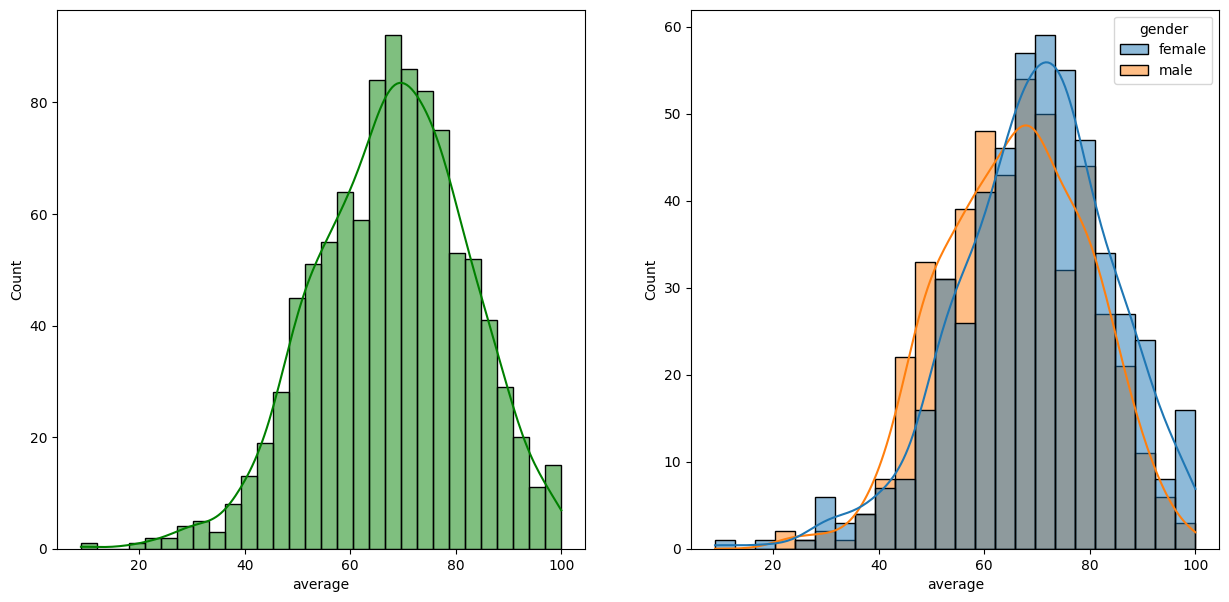

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()


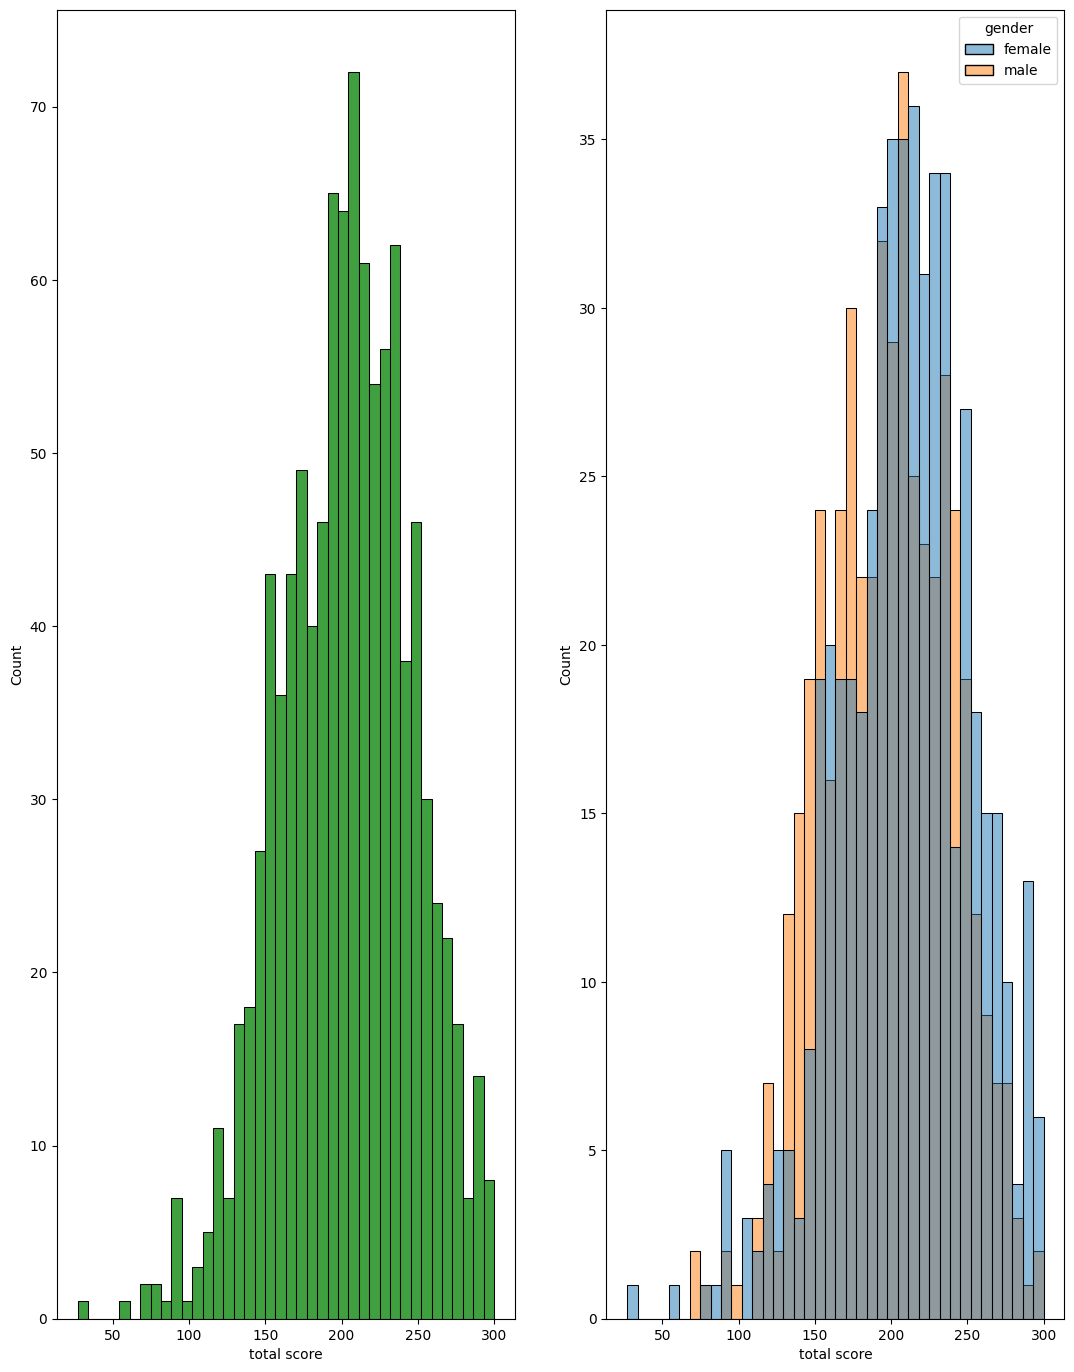

In [31]:
fig,axs = plt.subplots(1,2,figsize=(13,17))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=40,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',bins=40,hue='gender')
plt.show()

In [32]:
# femal student perform better tha male students

C:\Users\SAI\AppData\Local\Temp\ipykernel_6256\3382387801.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\SAI\AppData\Local\Temp\ipykernel_6256\3382387801.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\SAI\AppData\Local\Temp\ipykernel_6256\3382387801.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


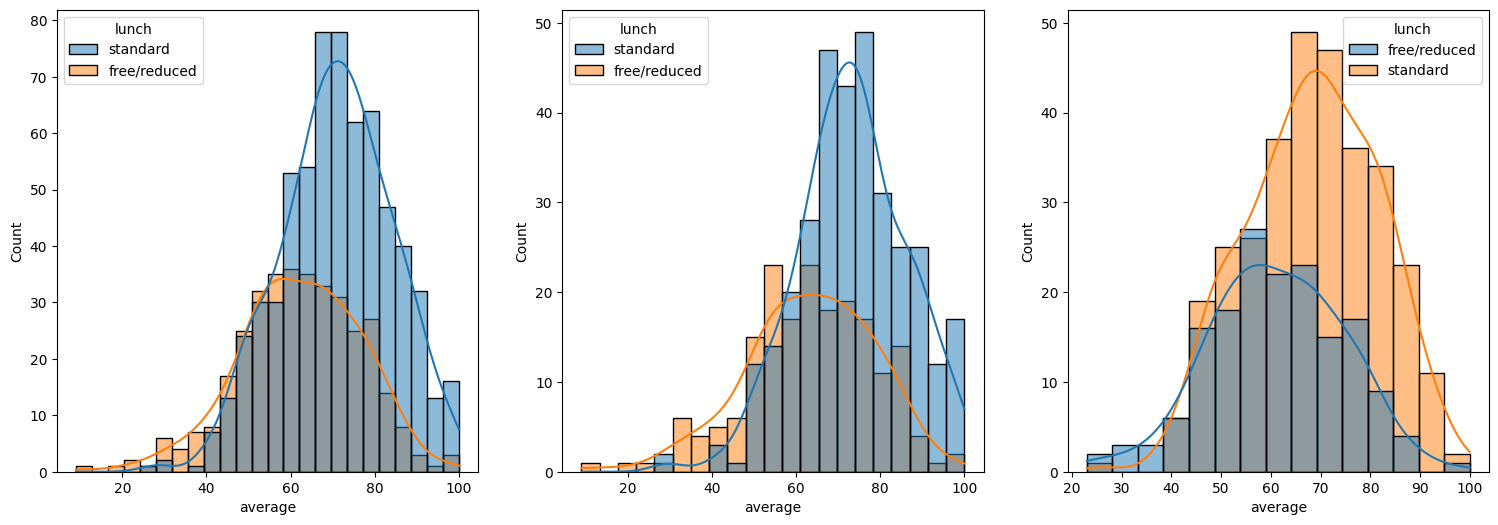

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

In [34]:
# standard lunch helps students better ti score well

In [35]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average'],
      dtype='object')

C:\Users\SAI\AppData\Local\Temp\ipykernel_6256\80323742.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\SAI\AppData\Local\Temp\ipykernel_6256\80323742.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\SAI\AppData\Local\Temp\ipykernel_6256\80323742.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


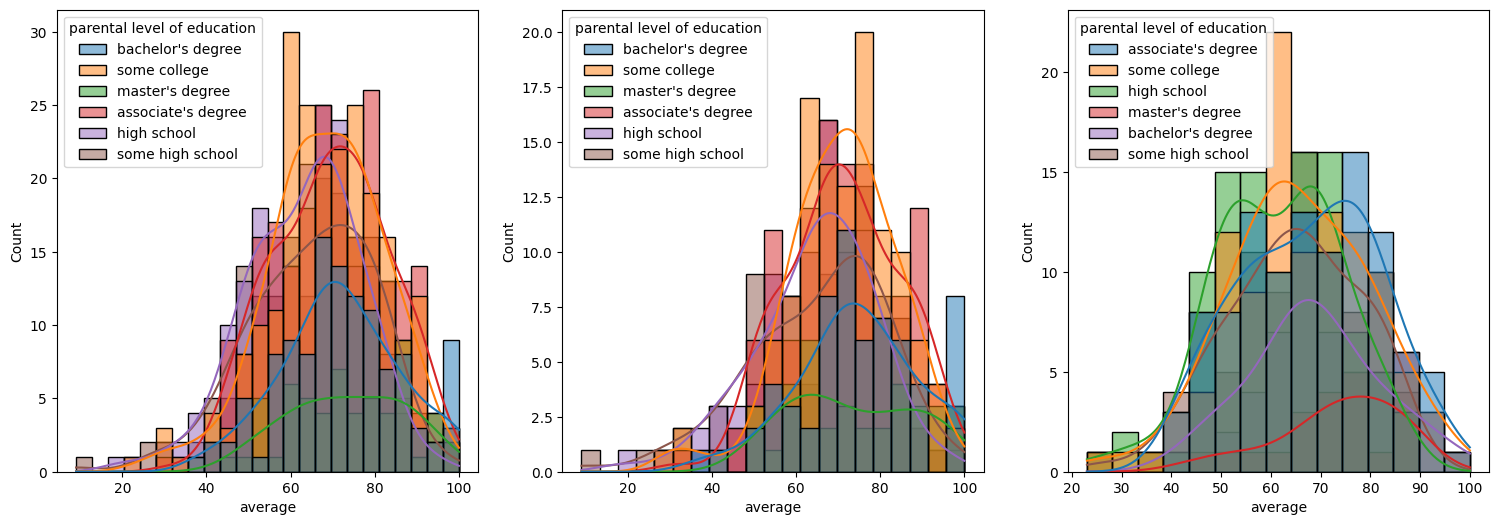

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

C:\Users\SAI\AppData\Local\Temp\ipykernel_6256\3382513985.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\SAI\AppData\Local\Temp\ipykernel_6256\3382513985.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\SAI\AppData\Local\Temp\ipykernel_6256\3382513985.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


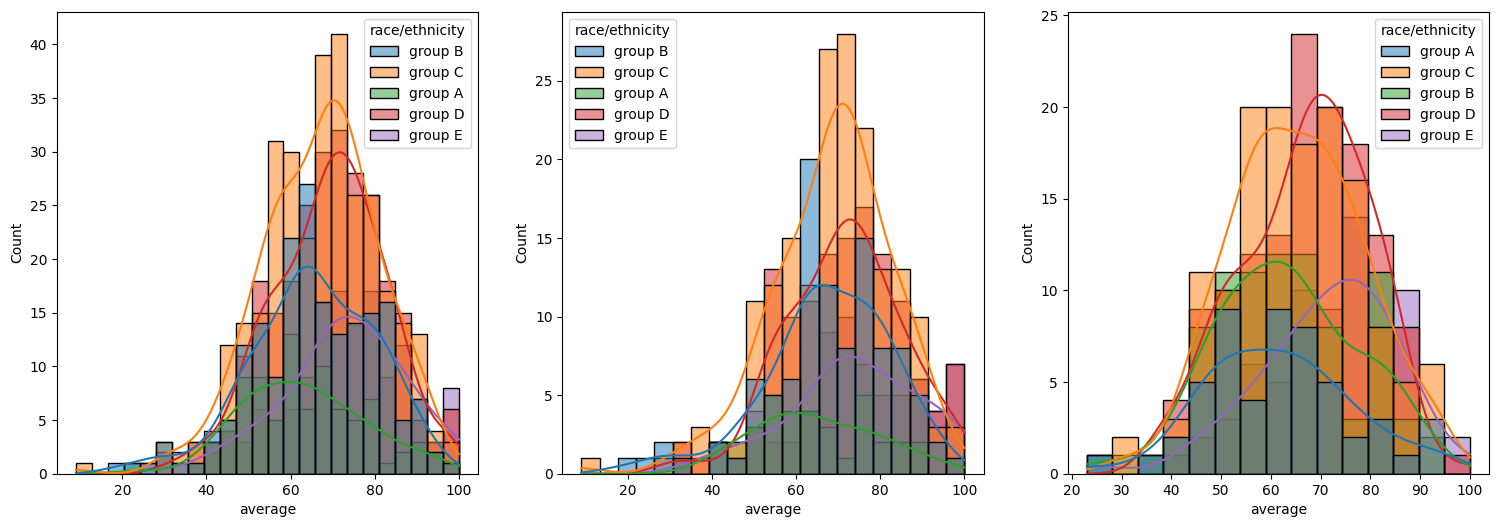

In [37]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

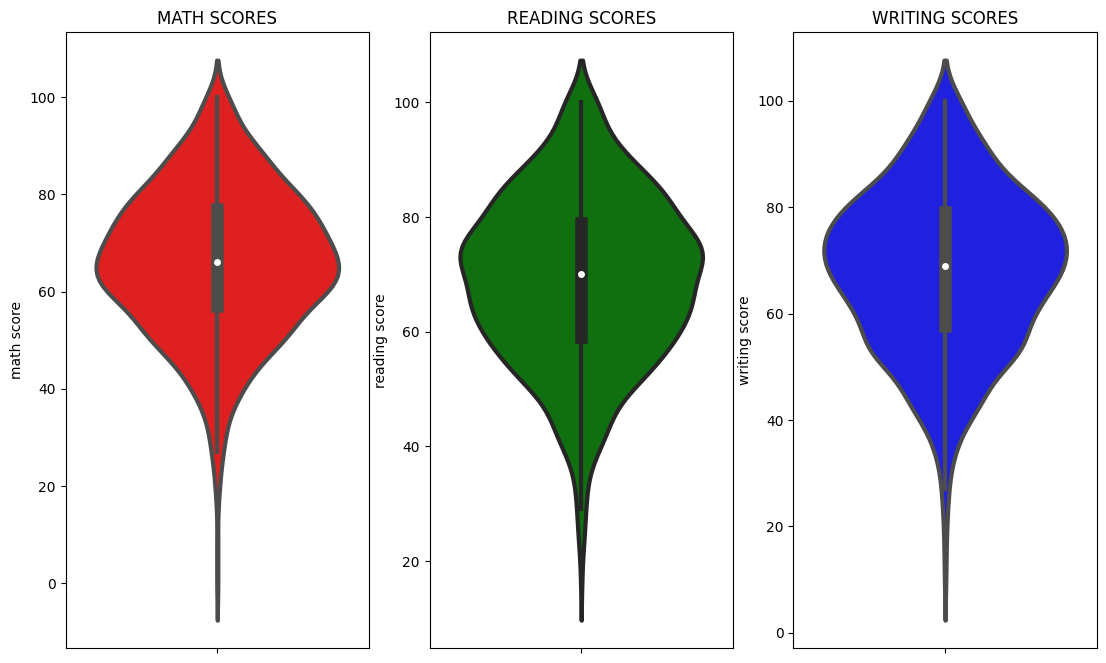

In [38]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

4.4 Feature Wise Visualization


In [39]:
# univariate 

<Axes: xlabel='gender', ylabel='Count'>

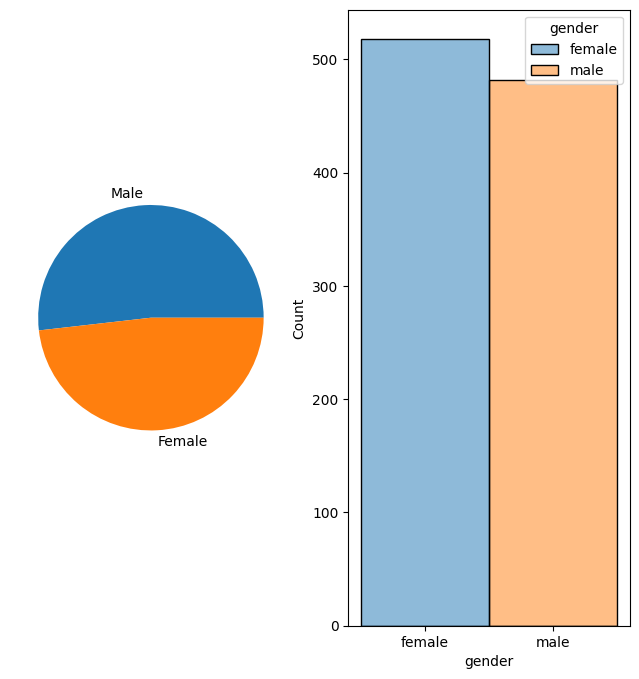

In [40]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.pie(data=df,x=df['gender'].value_counts(),labels=['Male','Female'])
plt.subplot(1,2,2)
sns.histplot(data=df,x=df['gender'],hue='gender')


multivariate analysis

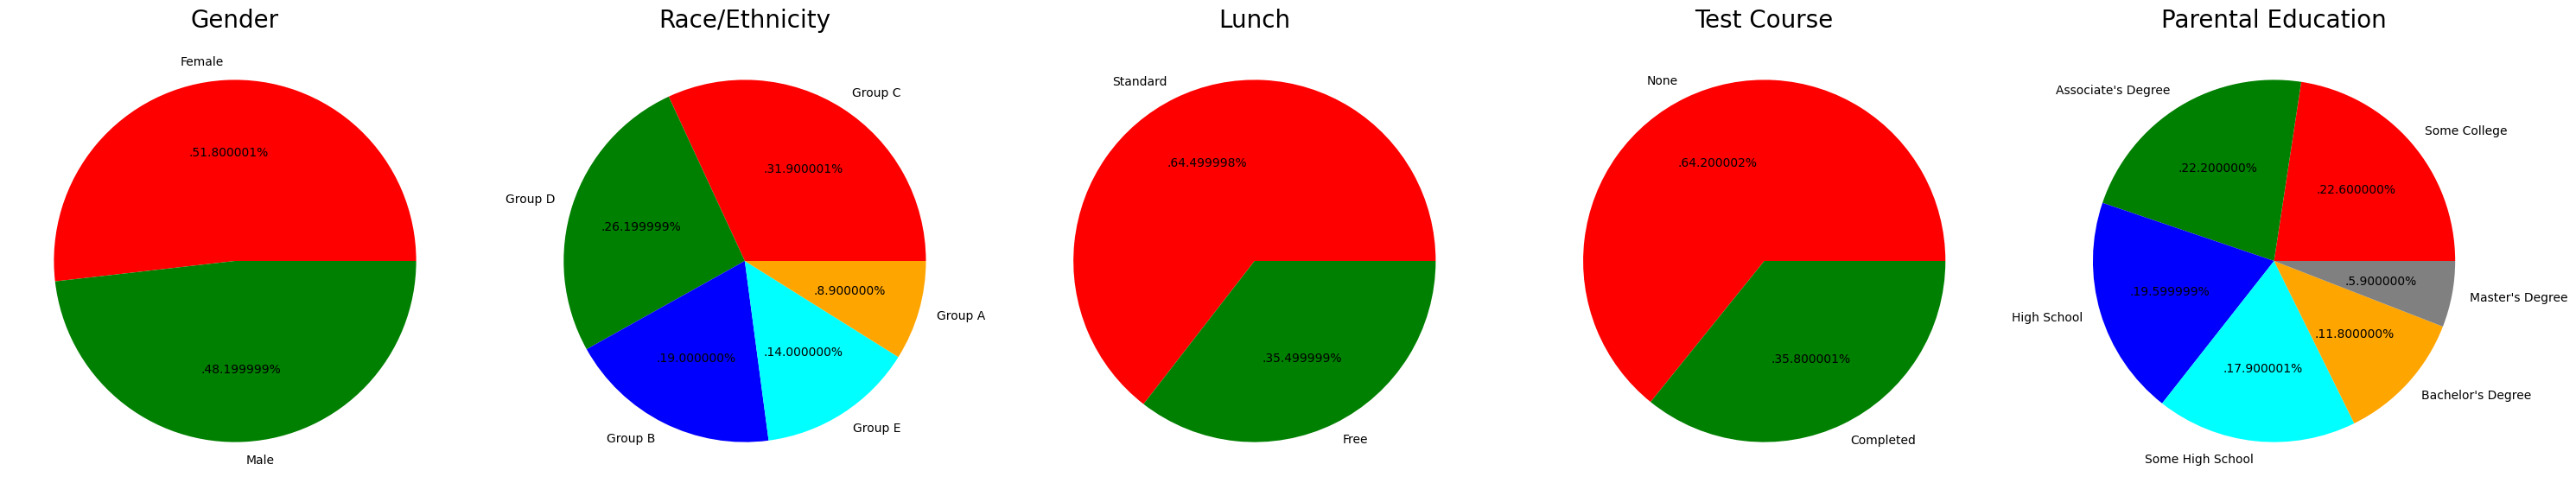

In [41]:
plt.rcParams['figure.figsize'] = (30, 15)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT


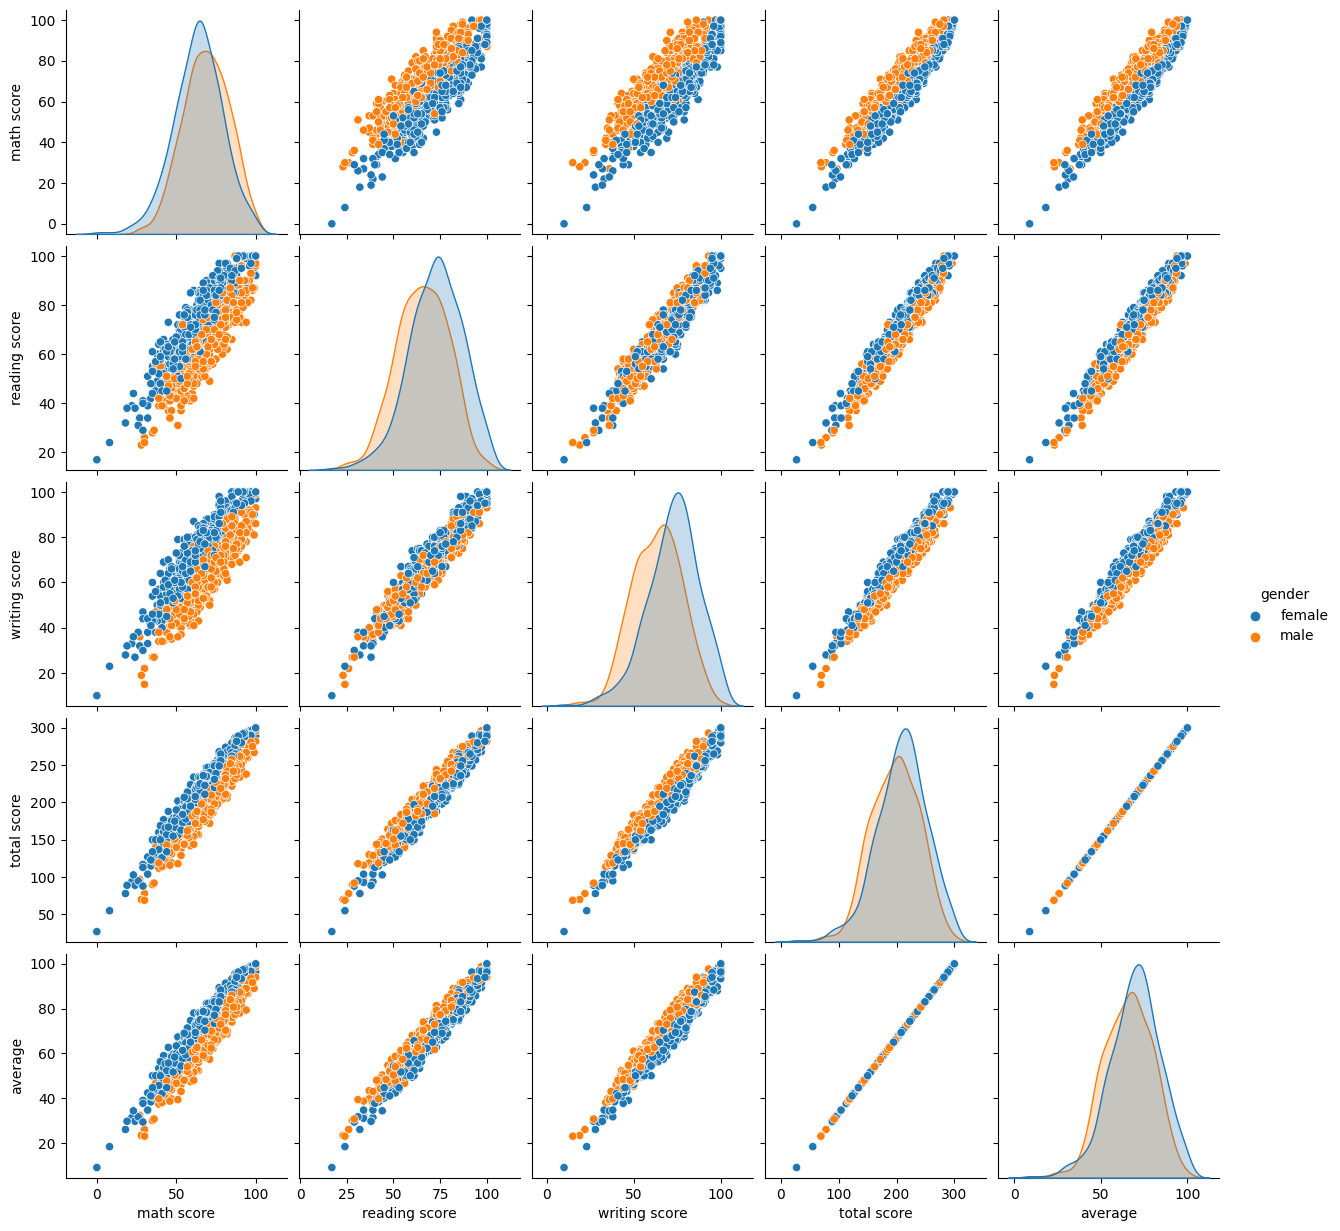

In [42]:
sns.pairplot(df,hue = 'gender')
plt.show()

5. Conclusions
Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.